# Exercises: 2

This document contains all my solutions to Exercises 2 of the Statical Data Analysis course at the University of Turku.

## 1.1 Variables in literature

Identify the variables used in the given parts of the following two articles and determine their types. (NOTE:
You may have to browse through the whole article in order to fully understand the study.)

• Article 1 (whole study): L.E. Juarez-Orozco et al., Machine learning in the integration of simple variables
for identifying patients with myocardial ischemia, DOI: https://doi.org/10.1007/s12350-018-1304-x

• Article 2 (Figures 1 & 2): W. He et al., High-salt diet inhibits tumour growth in mice via regulating
myeloid-derived suppressor cell differentiation, DOI: https://doi.org/10.1038/s41467-020-15524-1


### Solution 1.1

Here below is listed all used variables and their types used in the given two articles.



#### First Article

Numerical variables:

- Age
- Rest Heart Rate (BPM)
- Stress Heart Rate (BPM)
- % Max Heart Rate 
- Rest Systolic Blood Pressure (mmHg)
- Rest Diastolic Blood Pressure (mmHg)
- Stress Systolic Blood Pressure (mmHg)
- Stress Diastolic Blood Pressure (mmHg)
- Stress LVEF (%)
- Rest LFEV (%)
- Body Mass Index (kg/m^2)
- Duke Clinical Score


Categorical variables:
- Sex
- Type of Chest Complaints
- Smoking
- Dyslipidemia
- Hypertension
- Rest ECG
- Stress ECG
- Family History of Coronary Artety Disease
- Diabetes

Outcoming values:
- Myocardial Ischemia (MPR)
- Risk of MACE (MPR)

#### Second Article

Categorical Variables:
- Sex (Female or Male)
- Food (HSD or NSD)
- Mouse Type (BALB/c or C57BL/6J)

Numerical Variables:
- Tumour Weight (g)
- Tumour Diameter (cm)
- Duration of Research (days)
- Content of Na+ and Cl- in Six Organs
- Conent of Na+, Cl- and K+ in Serum
- Content of Na+, Cl- and K+ in Tumour
- Osmolality for seven organs

## 1.2 Cyclists

The files cyclists-helsinki.csv and cyclists-espoo.csv contain daily numbers of cyclists spotted on
selected streets in Helsinki and Espoo.

• Load the files and merge the data into a single data frame.

• For how many days were observations made in total?

• How many observation days were there for each street?

• On how many days were all streets observed simultaneously?

• Which street was the busiest in terms of the total number of cyclists?

• Filter out the dates which have one or more missing values. Does this affect your conclusion about the busiest street? Why or why not?

#### Solution 1.2

##### Load the files and merge the data into asingle data frame

In [90]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the files from the data directory

df_espoo = pd.read_csv('data/cyclists-espoo.csv', index_col=0)
df_helsinki = pd.read_csv('data/cyclists-helsinki.csv', index_col=0)

# Merge Espoo and Helsinki data into one data frame.

df = pd.merge(df_espoo, df_helsinki, how='outer', left_index=True, right_index=True, suffixes=('_espoo', '_helsinki'))


##### For how many days were observations made in total?

If you want to calculate how many days of observations have been made, we can just calculate the size of the indices.

Once the two datasets are merged, the total number of days of observations is obtained, even if one of them has no observations yet or one of them has no more observations.

In [91]:
# Print size of the data frame

print(df.index.size)

3134


Total number of observation days is: 3134

##### How many observation days were there for each street?

To calculate observation days for each street, we need to ignore NaN values and calculate the size of the each columns.

In [92]:
# Calculate the total number of observation days for each street in the data frame.

print((df.notna().sum(axis=0)))

Gallen-Kallela     1459
Länsiväylä         1460
Länsituulenkuja    2209
Eteläesplanadi     3072
Kaivokatu          1722
Kuusisaarentie     2640
Merikannontie      2843
dtype: int64


##### On how many days were all streets observed simultaneously?

In order to calculate observation dates when all rows have values, we need to make sure that no column in the row has zero values.

In [93]:
# Calculate the total number of days where all strees have observations.

print(df.notna().all(axis=1).sum())


1400


##### Which street was the busiest in terms of the total number of cyclists?

Now we need to print the street with the most inhabitants in total. We need to find the maximum value of the sum of cyclists on the street. 

In [94]:
# Print the busiest street in whole observation data frame

print(df.sum(axis=0).idxmax())

#Print the amount of population in the busiest street.

print(df.sum(axis=0).max())

Merikannontie
4839490.0


As shown above, Merikannontie is the busiest street in the data. 

The total number of cyclists is 4 839 490.

##### Filter out the dates which have one or more missing values. Does this affect your conclusion about the busiest street? Why or why not?

Let's start by filtering data with missing values. Then print the new street and its cyclist counts.

In [95]:
# Filter the data frame have no missing values and calculate the busiest street in the filtered data frame.

# Create a new data frame with no missing values
df_filtered = df.dropna()

# Print the busiest street in the filtered data frame
print(df_filtered.sum(axis=0).idxmax())

# Print the amount of population in the busiest street in the filtered data frame

print(df_filtered.sum(axis=0).max())

Kaivokatu
3016688.0


As shown above, the busiest street with filtered data is Kaivokatu, with 3 016 688 cyclists.

Let's print all street names and cyclists in ascending order for clearer conclusions.

In [96]:
# Print all street and their total cyclists in accending order in the non-filtered data frame.

print(df.sum(axis=0).sort_values())

# Print all street and their total cyclists in accending order in the filtered data frame.

print(df_filtered.sum(axis=0).sort_values())

Gallen-Kallela     1107151.0
Länsiväylä         1324149.0
Länsituulenkuja    2037502.0
Kuusisaarentie     2823869.0
Kaivokatu          3675674.0
Eteläesplanadi     3677532.0
Merikannontie      4839490.0
dtype: float64
Gallen-Kallela     1054062.0
Länsiväylä         1262780.0
Länsituulenkuja    1471640.0
Kuusisaarentie     1500513.0
Eteläesplanadi     1531870.0
Merikannontie      2445090.0
Kaivokatu          3016688.0
dtype: float64


The last result shows that the busiest street is in a different order than in the unfiltered data. The filtered data will certainly give more accurate information about which street is the busiest. It is possible that one of these streets has become busier after a construction project or some other action. However, the unfiltered data are certainly more accurate.

## 1.2 Human Heights

• Create a histogram and a density plot of the following two sets of data points, which contain human heights
measured in centimeters:

    – 170, 192, 184, 168, 176, 181, 163

    – 170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 168, 168, 168, 168, 176, 176, 176, 176, 181,
    181, 181, 181, 163, 163, 163, 163

• Based on the plots, would you consider the distributions to be normal? How confident are you about your
conclusion?

• The data sets contain similar values, but your conclusions may differ. Can you explain such a difference in
your results?

• (BONUS) Use a statistical test to assess the normality of the distributions. (NOTE: The test needed here
will be introduced in the topic 4.)


### Solution 1.3

#### Create a histogram and a density plot of the following two sets of data points, which contain human heights measured in centimeters

<Axes: ylabel='Density'>

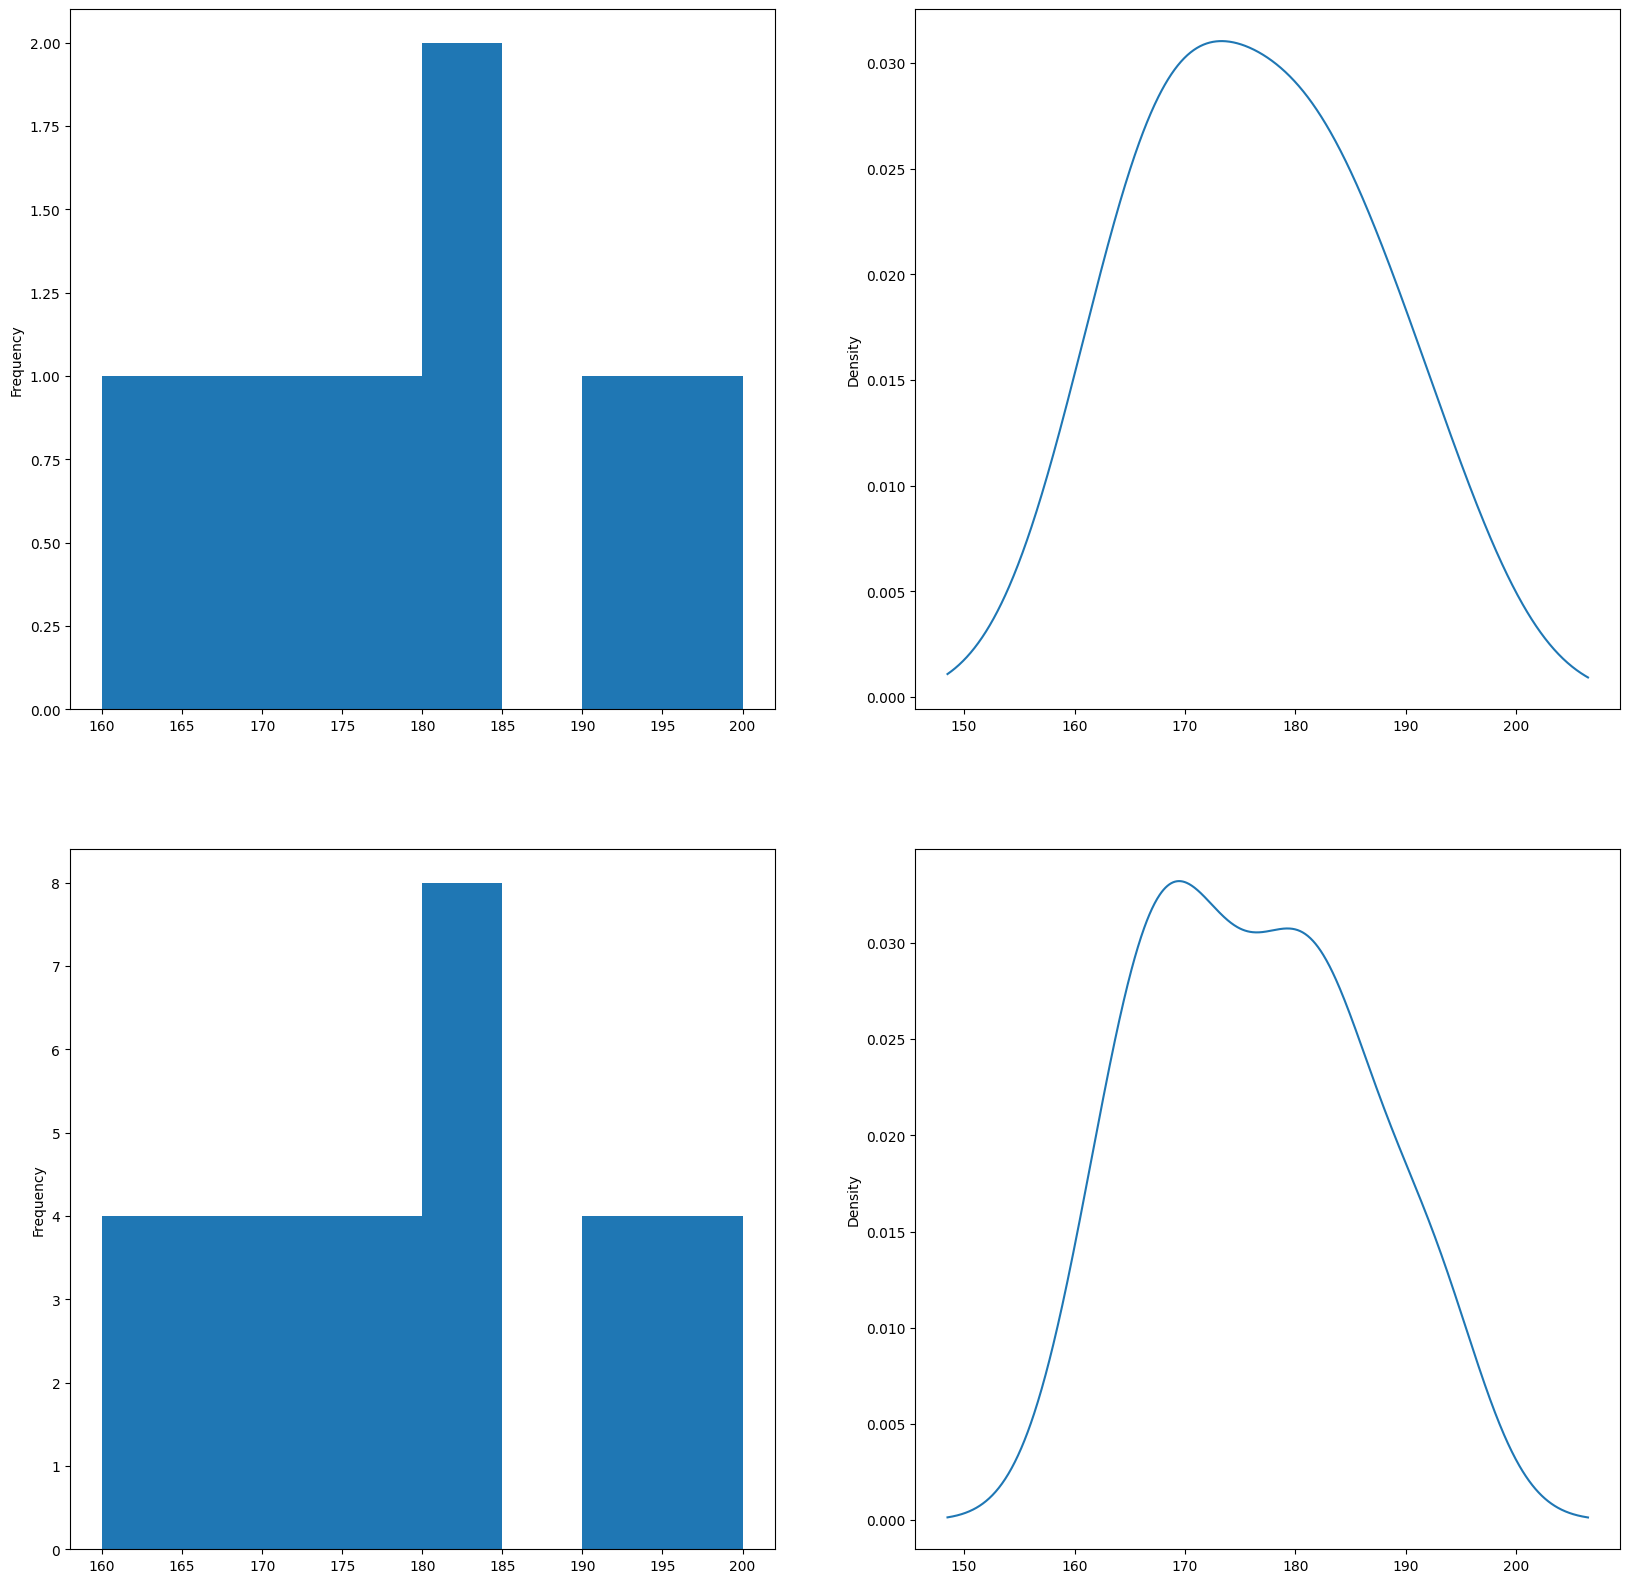

In [97]:
# Create a histogram of the set of data points.

dataset1 = pd.Series([170, 192, 184, 168, 176, 181, 163])
dataset2 = pd.Series([170, 170, 170, 170, 192, 192, 192,
                      192, 184, 184, 184, 184, 168, 168,
                      168, 168, 176, 176, 176, 176, 181,
                      181, 181, 181, 163, 163, 163, 163])

# Create a histogram of the set of data points.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

dataset1.plot.hist(bins=[160, 165, 170, 175, 180, 185, 190, 200], ax=axes[0, 0])
dataset2.plot.hist(bins=[160, 165, 170, 175, 180, 185, 190, 200], ax=axes[1, 0])

# Create a density plot of the set of data points.

dataset1.plot.density(ax=axes[0, 1])
dataset2.plot.density(ax=axes[1, 1])

#### Based on the plots, would you consider the distributions to be normal? How confident are you about your conclusion?

#### Observations:

If distribution is normal, it means that it should follow pattern of Gaussian curve, which is characterized a symmetric-bell-shaped curve. 

If we try to make observations by looking at the density curves we created, we can see that the first density curve from dataset1 almost follows a Gaussian curve. However, the problem is the number of observation points, which is quite small. This means that the first plot does not allow us to conclude that the distribution is either normal or non-normal, as there are very few points in the data.

But what about the second plot. As we can see, the second plot does not follow the Gaussian curve model because there are some decreasing values in the middle of the plot's peak. So we have to say that the second graph suggests that its distribution is abnormal.

### The data sets contain similar values, but your conclusions may differ. Can you explain such a difference in your results?

As can be seen from the plotted histogram, both datasets contain similar values, but the density curves are still different. This is because the "dataset2" has more observation points, which increases the precision of the pattern and makes it more like an abnormal distribution.

## 2.4 World temperature
• Download the data set from https://climate.nasa.gov/vital-signs/global-temperature/ and consider the
No_smoothing variable.

• Calculate the mean and the median of the data.

• Create a histogram and a density plot for the pre-2000 measurements. Does the variable seem to be
normally distributed?

• Create a histogram and a density plot for the measurements from year 2000 onwards. Does the variable
seem to be normally distributed?

• (BONUS) Use a statistical test to assess the normality of the distributions. (NOTE: The test needed here
will be introduced in the topic 4.)


In [98]:
# Load the data from data directory
wt = pd.read_csv('data/graph.txt', sep=' ', skiprows=[0, 1, 2, 4], skipinitialspace=True)

# Define No_Smoothing in variable.
ns = wt.No_Smoothing

#### Calculate the mean and the median of the data.

In [99]:
# Print the mean and median of the No_smoothing data.
print(ns.mean())
print(ns.median())

0.0657638888888889
-0.045


Mean value of No_smoothing is: 0.0657638888888889

Median value of No_smoothing is: -0.045

#### Create a histogram and a density plot for the pre-2000 measurements. Does the variable seem to be normally distributed?

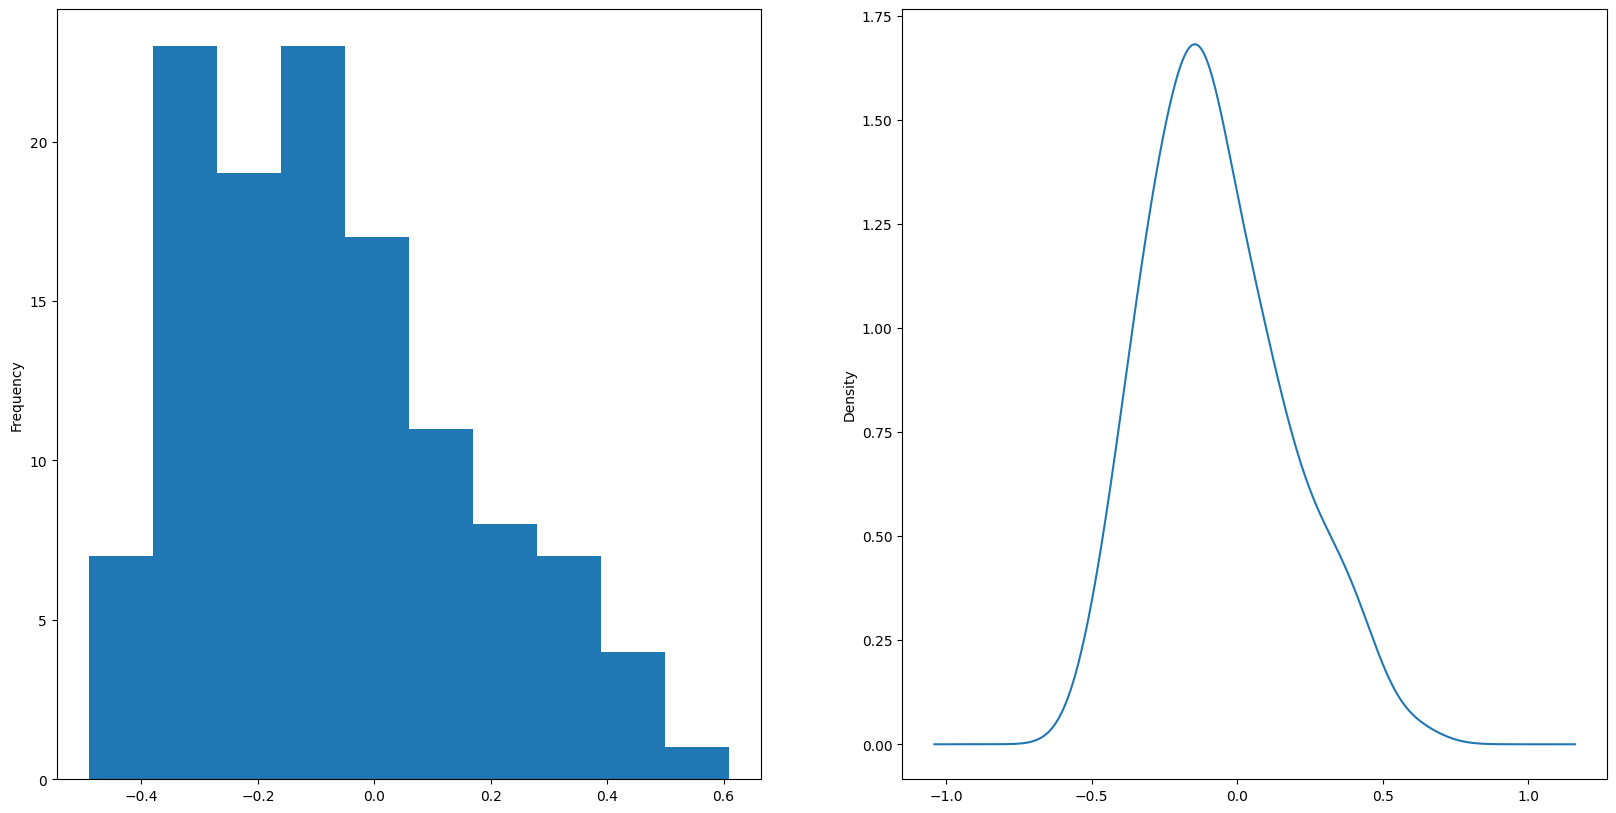

In [100]:
# Variable for the data points less than 2000.
pre = wt.loc[wt.Year < 2000].No_Smoothing

# Create a subplot with 2 rows and 1 column.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a histogram of the set of data points.
pre.plot.hist(bins=10, ax=axes[0])
pre.density = pre.plot.density(ax=axes[1])

The distribution look mostly normal, but it is slightly right-skewed. I would still say that it has normal distribution.

#### Create a histogram and a density plot for the measurements from year 2000 onwards. Does the variable seem to be normally distributed?

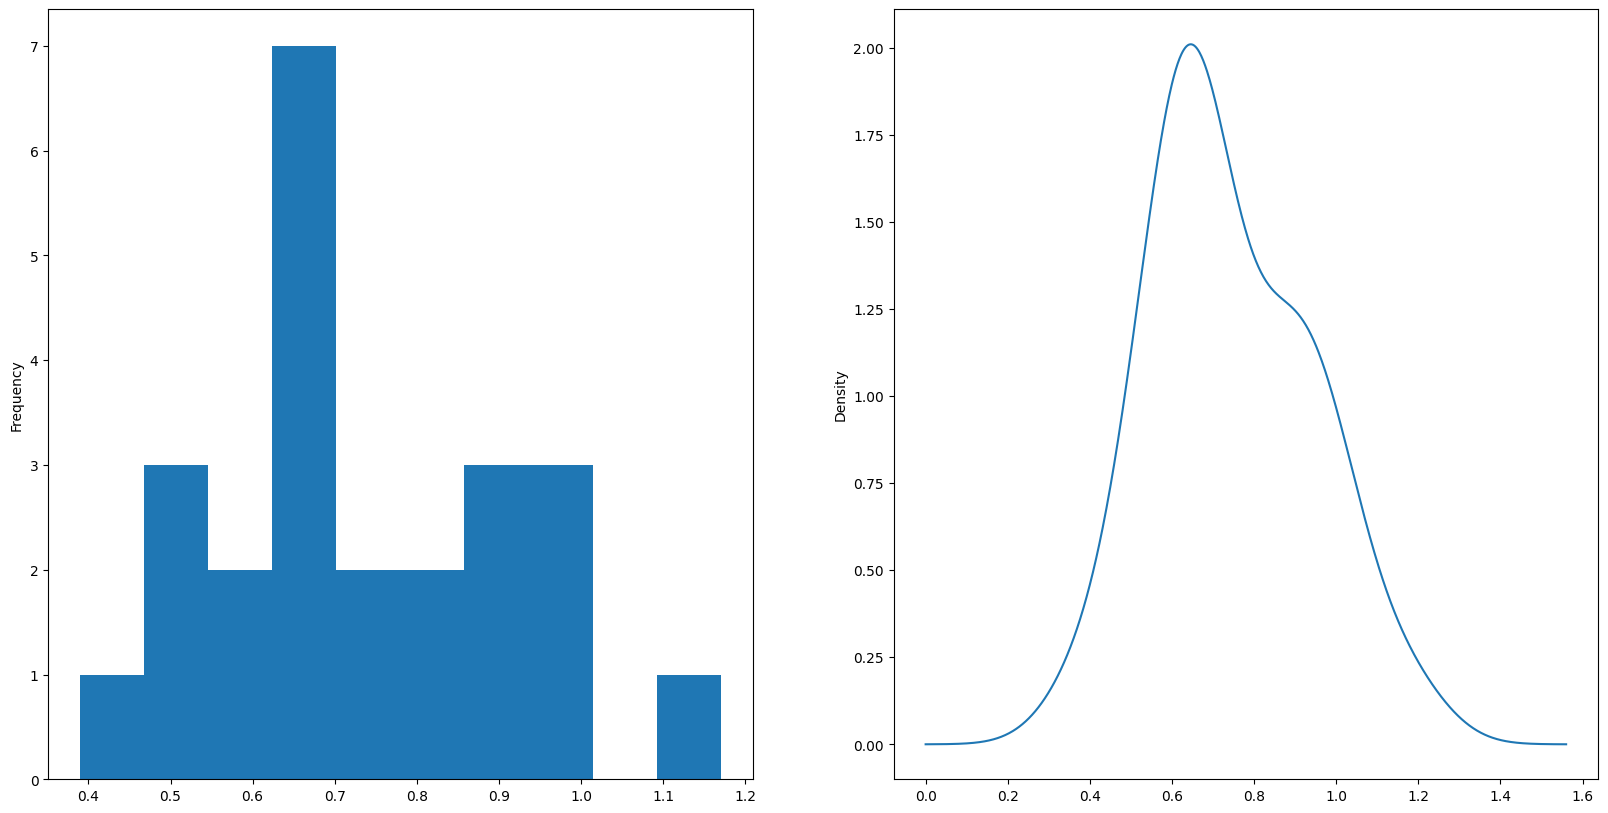

In [101]:
# Variable for the data points more than 2000.
post = wt.loc[wt.Year >= 2000].No_Smoothing

# Create a subplot with 2 rows and 1 column.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a histogram of the set of data points.
post.plot.hist(bins=10, ax=axes[0])
post.density = post.plot.density(ax=axes[1])

The distribution does not look normal because there are some growing parts on the left side of the curve. The histogram also shows that the values increase between 0.85 and 1.0, which is outside the peak of the curve.